In [2]:
from __future__ import division
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pyod.models.knn import KNN 
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import column_or_1d
from pyod.utils.utility import precision_n_scores
from sklearn.utils import check_consistent_length
import time

timekeeping = time.time()

In [3]:
path="./第四次大作业/abalone/benchmarks"
file_list=[]

for _ in os.listdir(path):
    file_list.append(path + '/'+ _)
columns = ['V2', 'diff.score', 'original.label', 'V1', 'V4', 'V3', 'V7', 'V5', 'V6']
    

In [5]:
knn_roc = []
knn_prn = []
lof_roc = []
lof_prn = []
pca_roc = []
pca_prn = []
iforest_roc = []
iforest_prn = []

In [6]:
for file in file_list:
    print(file)
    data = pd.read_csv(file, index_col=0)
    data_len = len(data)
    class_mapping = {"anomaly":1, "nominal":0}
    data['ground.truth'] = data['ground.truth'].map(class_mapping)
    y = data['ground.truth']
    x = data[columns]
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
#KNN异常值检测方法
    clf_name = 'KNN'
    clf = KNN()  
    clf.fit(X_train)   
    y_train_pred = clf.labels_   
    y_train_scores = clf.decision_scores_   
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)

    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test) 
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    knn_roc.append(roc)
    knn_prn.append(prn)

#LOF异常值检测方法
    clf_name = 'LOF'
    clf = LOF()  
    clf.fit(X_train)   

    y_train_pred = clf.labels_  
    y_train_scores = clf.decision_scores_  
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
 
    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test)  
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    lof_roc.append(roc)
    lof_prn.append(prn)
#PCA异常值检测方法
    clf_name = 'PCA'
    clf = PCA()  
    clf.fit(X_train)   
    y_train_pred = clf.labels_   
    y_train_scores = clf.decision_scores_   
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
 
    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test)  
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    pca_roc.append(roc)
    pca_prn.append(prn)
#IForest异常值检测方法
    clf_name = 'IForest'
    clf = IForest()  
    clf.fit(X_train)  
 
    y_train_pred = clf.labels_  
    y_train_scores = clf.decision_scores_   
    print("On train Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
 
    y_test_pred = clf.predict(X_test)   
    y_test_scores = clf.decision_function(X_test)  
    print("On Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    y_true = column_or_1d(y_test)
    y_pred = column_or_1d(y_test_scores)
    check_consistent_length(y_true, y_pred)

    roc = np.round(roc_auc_score(y_true, y_pred), decimals=4),
    prn = np.round(precision_n_scores(y_true, y_pred), decimals=4)
    iforest_roc.append(roc)
    iforest_prn.append(prn)  

./第四次大作业/abalone/benchmarks/abalone_benchmark_0001.csv
On train Data:
KNN ROC:0.8195, precision @ rank n:0.729
On Test Data:
KNN ROC:0.8196, precision @ rank n:0.7543
On train Data:
LOF ROC:0.4931, precision @ rank n:0.4919
On Test Data:
LOF ROC:0.5063, precision @ rank n:0.4571
On train Data:
PCA ROC:0.4715, precision @ rank n:0.4702
On Test Data:
PCA ROC:0.4589, precision @ rank n:0.4229
On train Data:
IForest ROC:0.4262, precision @ rank n:0.4336
On Test Data:
IForest ROC:0.388, precision @ rank n:0.3714
./第四次大作业/abalone/benchmarks/abalone_benchmark_0002.csv
On train Data:
KNN ROC:0.8297, precision @ rank n:0.752
On Test Data:
KNN ROC:0.8251, precision @ rank n:0.7513
On train Data:
LOF ROC:0.5029, precision @ rank n:0.504
On Test Data:
LOF ROC:0.4839, precision @ rank n:0.5228
On train Data:
PCA ROC:0.4687, precision @ rank n:0.4721
On Test Data:
PCA ROC:0.4327, precision @ rank n:0.4873
On train Data:
IForest ROC:0.4847, precision @ rank n:0.4814
On Test Data:
IForest ROC:0.4316, 

On Test Data:
KNN ROC:0.8606, precision @ rank n:0.7614
On train Data:
LOF ROC:0.4941, precision @ rank n:0.479
On Test Data:
LOF ROC:0.5073, precision @ rank n:0.4489
On train Data:
PCA ROC:0.4907, precision @ rank n:0.4926
On Test Data:
PCA ROC:0.4498, precision @ rank n:0.4148
On train Data:
IForest ROC:0.4864, precision @ rank n:0.4885
On Test Data:
IForest ROC:0.4432, precision @ rank n:0.3977
./第四次大作业/abalone/benchmarks/abalone_benchmark_0018.csv
On train Data:
KNN ROC:0.8315, precision @ rank n:0.7597
On Test Data:
KNN ROC:0.8131, precision @ rank n:0.7538
On train Data:
LOF ROC:0.4719, precision @ rank n:0.4577
On Test Data:
LOF ROC:0.4853, precision @ rank n:0.5176
On train Data:
PCA ROC:0.4631, precision @ rank n:0.4685
On Test Data:
PCA ROC:0.4774, precision @ rank n:0.5126
On train Data:
IForest ROC:0.4366, precision @ rank n:0.4483
On Test Data:
IForest ROC:0.4356, precision @ rank n:0.4874
./第四次大作业/abalone/benchmarks/abalone_benchmark_0019.csv
On train Data:
KNN ROC:0.823

On train Data:
IForest ROC:0.4267, precision @ rank n:0.4185
On Test Data:
IForest ROC:0.4367, precision @ rank n:0.4667
./第四次大作业/abalone/benchmarks/abalone_benchmark_0034.csv
On train Data:
KNN ROC:0.8187, precision @ rank n:0.7454
On Test Data:
KNN ROC:0.8484, precision @ rank n:0.78
On train Data:
LOF ROC:0.5049, precision @ rank n:0.4974
On Test Data:
LOF ROC:0.4649, precision @ rank n:0.485
On train Data:
PCA ROC:0.4803, precision @ rank n:0.4855
On Test Data:
PCA ROC:0.4959, precision @ rank n:0.53
On train Data:
IForest ROC:0.4596, precision @ rank n:0.4657
On Test Data:
IForest ROC:0.4896, precision @ rank n:0.515
./第四次大作业/abalone/benchmarks/abalone_benchmark_0035.csv
On train Data:
KNN ROC:0.8398, precision @ rank n:0.7463
On Test Data:
KNN ROC:0.8478, precision @ rank n:0.7933
On train Data:
LOF ROC:0.4993, precision @ rank n:0.4885
On Test Data:
LOF ROC:0.5301, precision @ rank n:0.5529
On train Data:
PCA ROC:0.4751, precision @ rank n:0.4681
On Test Data:
PCA ROC:0.476, pre

On train Data:
IForest ROC:0.5046, precision @ rank n:0.509
On Test Data:
IForest ROC:0.5361, precision @ rank n:0.5236
./第四次大作业/abalone/benchmarks/abalone_benchmark_0050.csv
On train Data:
KNN ROC:0.825, precision @ rank n:0.7549
On Test Data:
KNN ROC:0.8591, precision @ rank n:0.765
On train Data:
LOF ROC:0.469, precision @ rank n:0.4734
On Test Data:
LOF ROC:0.4755, precision @ rank n:0.4536
On train Data:
PCA ROC:0.448, precision @ rank n:0.4799
On Test Data:
PCA ROC:0.4724, precision @ rank n:0.4536
On train Data:
IForest ROC:0.412, precision @ rank n:0.4332
On Test Data:
IForest ROC:0.4158, precision @ rank n:0.3934
./第四次大作业/abalone/benchmarks/abalone_benchmark_0051.csv
On train Data:
KNN ROC:0.8314, precision @ rank n:0.755
On Test Data:
KNN ROC:0.8071, precision @ rank n:0.7065
On train Data:
LOF ROC:0.4918, precision @ rank n:0.494
On Test Data:
LOF ROC:0.4881, precision @ rank n:0.4837
On train Data:
PCA ROC:0.4497, precision @ rank n:0.4649
On Test Data:
PCA ROC:0.4885, prec

On train Data:
IForest ROC:0.4914, precision @ rank n:0.5136
On Test Data:
IForest ROC:0.4882, precision @ rank n:0.5093
./第四次大作业/abalone/benchmarks/abalone_benchmark_0071.csv
On train Data:
KNN ROC:0.961, precision @ rank n:0.9078
On Test Data:
KNN ROC:0.9742, precision @ rank n:0.9026
On train Data:
LOF ROC:0.5267, precision @ rank n:0.5281
On Test Data:
LOF ROC:0.5454, precision @ rank n:0.5325
On train Data:
PCA ROC:0.4699, precision @ rank n:0.4875
On Test Data:
PCA ROC:0.5083, precision @ rank n:0.474
On train Data:
IForest ROC:0.5385, precision @ rank n:0.5172
On Test Data:
IForest ROC:0.5676, precision @ rank n:0.526
./第四次大作业/abalone/benchmarks/abalone_benchmark_0072.csv
On train Data:
KNN ROC:0.9715, precision @ rank n:0.9107
On Test Data:
KNN ROC:0.9729, precision @ rank n:0.9333
On train Data:
LOF ROC:0.5184, precision @ rank n:0.4966
On Test Data:
LOF ROC:0.5093, precision @ rank n:0.5394
On train Data:
PCA ROC:0.5418, precision @ rank n:0.4966
On Test Data:
PCA ROC:0.4889,

On train Data:
IForest ROC:0.4786, precision @ rank n:0.5
On Test Data:
IForest ROC:0.4463, precision @ rank n:0.4878
./第四次大作业/abalone/benchmarks/abalone_benchmark_0087.csv
On train Data:
KNN ROC:0.9655, precision @ rank n:0.906
On Test Data:
KNN ROC:0.9761, precision @ rank n:0.9315
On train Data:
LOF ROC:0.5367, precision @ rank n:0.5381
On Test Data:
LOF ROC:0.5264, precision @ rank n:0.4932
On train Data:
PCA ROC:0.4929, precision @ rank n:0.4814
On Test Data:
PCA ROC:0.5431, precision @ rank n:0.5068
On train Data:
IForest ROC:0.6823, precision @ rank n:0.6386
On Test Data:
IForest ROC:0.6958, precision @ rank n:0.6164
./第四次大作业/abalone/benchmarks/abalone_benchmark_0088.csv
On train Data:
KNN ROC:0.9675, precision @ rank n:0.91
On Test Data:
KNN ROC:0.9799, precision @ rank n:0.9209
On train Data:
LOF ROC:0.5344, precision @ rank n:0.5425
On Test Data:
LOF ROC:0.5639, precision @ rank n:0.5108
On train Data:
PCA ROC:0.4917, precision @ rank n:0.4967
On Test Data:
PCA ROC:0.5186, pr

On train Data:
IForest ROC:0.4254, precision @ rank n:0.4346
On Test Data:
IForest ROC:0.4707, precision @ rank n:0.5226
./第四次大作业/abalone/benchmarks/abalone_benchmark_0103.csv
On train Data:
KNN ROC:0.9695, precision @ rank n:0.9195
On Test Data:
KNN ROC:0.956, precision @ rank n:0.898
On train Data:
LOF ROC:0.4744, precision @ rank n:0.4975
On Test Data:
LOF ROC:0.4544, precision @ rank n:0.449
On train Data:
PCA ROC:0.4658, precision @ rank n:0.4926
On Test Data:
PCA ROC:0.4655, precision @ rank n:0.5034
On train Data:
IForest ROC:0.4148, precision @ rank n:0.4745
On Test Data:
IForest ROC:0.3984, precision @ rank n:0.415
./第四次大作业/abalone/benchmarks/abalone_benchmark_0104.csv
On train Data:
KNN ROC:0.9632, precision @ rank n:0.898
On Test Data:
KNN ROC:0.95, precision @ rank n:0.8929
On train Data:
LOF ROC:0.4917, precision @ rank n:0.4762
On Test Data:
LOF ROC:0.5074, precision @ rank n:0.4857
On train Data:
PCA ROC:0.5174, precision @ rank n:0.5034
On Test Data:
PCA ROC:0.5286, pre

On train Data:
IForest ROC:0.5316, precision @ rank n:0.5177
On Test Data:
IForest ROC:0.5458, precision @ rank n:0.5849
./第四次大作业/abalone/benchmarks/abalone_benchmark_0119.csv
On train Data:
KNN ROC:0.9569, precision @ rank n:0.9065
On Test Data:
KNN ROC:0.9749, precision @ rank n:0.9299
On train Data:
LOF ROC:0.5064, precision @ rank n:0.5192
On Test Data:
LOF ROC:0.5121, precision @ rank n:0.5605
On train Data:
PCA ROC:0.4887, precision @ rank n:0.4975
On Test Data:
PCA ROC:0.4138, precision @ rank n:0.4841
On train Data:
IForest ROC:0.5221, precision @ rank n:0.5342
On Test Data:
IForest ROC:0.4744, precision @ rank n:0.5223
./第四次大作业/abalone/benchmarks/abalone_benchmark_0120.csv
On train Data:
KNN ROC:0.9639, precision @ rank n:0.9023
On Test Data:
KNN ROC:0.9379, precision @ rank n:0.8714
On train Data:
LOF ROC:0.4994, precision @ rank n:0.4991
On Test Data:
LOF ROC:0.4733, precision @ rank n:0.4643
On train Data:
PCA ROC:0.5037, precision @ rank n:0.5096
On Test Data:
PCA ROC:0.47

On train Data:
IForest ROC:0.4615, precision @ rank n:0.4843
On Test Data:
IForest ROC:0.5281, precision @ rank n:0.5468
./第四次大作业/abalone/benchmarks/abalone_benchmark_0135.csv
On train Data:
KNN ROC:0.8217, precision @ rank n:0.7333
On Test Data:
KNN ROC:0.8267, precision @ rank n:0.75
On train Data:
LOF ROC:0.4713, precision @ rank n:0.4612
On Test Data:
LOF ROC:0.4701, precision @ rank n:0.4847
On train Data:
PCA ROC:0.4727, precision @ rank n:0.4735
On Test Data:
PCA ROC:0.4947, precision @ rank n:0.5153
On train Data:
IForest ROC:0.4605, precision @ rank n:0.4626
On Test Data:
IForest ROC:0.4992, precision @ rank n:0.5306
./第四次大作业/abalone/benchmarks/abalone_benchmark_0136.csv
On train Data:
KNN ROC:0.8294, precision @ rank n:0.7595
On Test Data:
KNN ROC:0.8443, precision @ rank n:0.7609
On train Data:
LOF ROC:0.4918, precision @ rank n:0.5046
On Test Data:
LOF ROC:0.4767, precision @ rank n:0.4674
On train Data:
PCA ROC:0.4612, precision @ rank n:0.4665
On Test Data:
PCA ROC:0.5028

On train Data:
IForest ROC:0.4693, precision @ rank n:0.4748
On Test Data:
IForest ROC:0.4396, precision @ rank n:0.5123
./第四次大作业/abalone/benchmarks/abalone_benchmark_0151.csv
On train Data:
KNN ROC:0.824, precision @ rank n:0.7474
On Test Data:
KNN ROC:0.7998, precision @ rank n:0.745
On train Data:
LOF ROC:0.4748, precision @ rank n:0.4858
On Test Data:
LOF ROC:0.4389, precision @ rank n:0.475
On train Data:
PCA ROC:0.4465, precision @ rank n:0.4702
On Test Data:
PCA ROC:0.4423, precision @ rank n:0.495
On train Data:
IForest ROC:0.4939, precision @ rank n:0.4922
On Test Data:
IForest ROC:0.4797, precision @ rank n:0.505
./第四次大作业/abalone/benchmarks/abalone_benchmark_0152.csv
On train Data:
KNN ROC:0.8342, precision @ rank n:0.7457
On Test Data:
KNN ROC:0.8312, precision @ rank n:0.7299
On train Data:
LOF ROC:0.5187, precision @ rank n:0.5166
On Test Data:
LOF ROC:0.5372, precision @ rank n:0.4943
On train Data:
PCA ROC:0.4784, precision @ rank n:0.4808
On Test Data:
PCA ROC:0.478, pr

On train Data:
IForest ROC:0.4333, precision @ rank n:0.4309
On Test Data:
IForest ROC:0.4201, precision @ rank n:0.4643
./第四次大作业/abalone/benchmarks/abalone_benchmark_0167.csv
On train Data:
KNN ROC:0.826, precision @ rank n:0.7371
On Test Data:
KNN ROC:0.8315, precision @ rank n:0.7554
On train Data:
LOF ROC:0.5005, precision @ rank n:0.4851
On Test Data:
LOF ROC:0.4698, precision @ rank n:0.4402
On train Data:
PCA ROC:0.4755, precision @ rank n:0.4634
On Test Data:
PCA ROC:0.4405, precision @ rank n:0.4565
On train Data:
IForest ROC:0.4535, precision @ rank n:0.4607
On Test Data:
IForest ROC:0.4008, precision @ rank n:0.413
./第四次大作业/abalone/benchmarks/abalone_benchmark_0168.csv
On train Data:
KNN ROC:0.8214, precision @ rank n:0.7366
On Test Data:
KNN ROC:0.8136, precision @ rank n:0.7351
On train Data:
LOF ROC:0.4673, precision @ rank n:0.4441
On Test Data:
LOF ROC:0.496, precision @ rank n:0.5243
On train Data:
PCA ROC:0.468, precision @ rank n:0.4579
On Test Data:
PCA ROC:0.485, p

On train Data:
IForest ROC:0.4896, precision @ rank n:0.4757
On Test Data:
IForest ROC:0.4927, precision @ rank n:0.3951
./第四次大作业/abalone/benchmarks/abalone_benchmark_0183.csv
On train Data:
KNN ROC:0.7862, precision @ rank n:0.7184
On Test Data:
KNN ROC:0.795, precision @ rank n:0.7463
On train Data:
LOF ROC:0.4755, precision @ rank n:0.4789
On Test Data:
LOF ROC:0.473, precision @ rank n:0.5025
On train Data:
PCA ROC:0.493, precision @ rank n:0.4934
On Test Data:
PCA ROC:0.4672, precision @ rank n:0.5174
On train Data:
IForest ROC:0.5349, precision @ rank n:0.5145
On Test Data:
IForest ROC:0.5144, precision @ rank n:0.5473
./第四次大作业/abalone/benchmarks/abalone_benchmark_0184.csv
On train Data:
KNN ROC:0.7862, precision @ rank n:0.7162
On Test Data:
KNN ROC:0.8024, precision @ rank n:0.7182
On train Data:
LOF ROC:0.4856, precision @ rank n:0.4752
On Test Data:
LOF ROC:0.5265, precision @ rank n:0.4696
On train Data:
PCA ROC:0.4863, precision @ rank n:0.4846
On Test Data:
PCA ROC:0.4981,

On train Data:
IForest ROC:0.479, precision @ rank n:0.4777
On Test Data:
IForest ROC:0.5498, precision @ rank n:0.5316
./第四次大作业/abalone/benchmarks/abalone_benchmark_0199.csv
On train Data:
KNN ROC:0.803, precision @ rank n:0.7255
On Test Data:
KNN ROC:0.8312, precision @ rank n:0.7432
On train Data:
LOF ROC:0.4633, precision @ rank n:0.4455
On Test Data:
LOF ROC:0.4993, precision @ rank n:0.4754
On train Data:
PCA ROC:0.493, precision @ rank n:0.4855
On Test Data:
PCA ROC:0.4724, precision @ rank n:0.459
On train Data:
IForest ROC:0.4865, precision @ rank n:0.4745
On Test Data:
IForest ROC:0.4889, precision @ rank n:0.4645
./第四次大作业/abalone/benchmarks/abalone_benchmark_0200.csv
On train Data:
KNN ROC:0.7687, precision @ rank n:0.7035
On Test Data:
KNN ROC:0.7777, precision @ rank n:0.6923
On train Data:
LOF ROC:0.4916, precision @ rank n:0.4814
On Test Data:
LOF ROC:0.4903, precision @ rank n:0.467
On train Data:
PCA ROC:0.4657, precision @ rank n:0.4721
On Test Data:
PCA ROC:0.4442, p

On train Data:
IForest ROC:0.4822, precision @ rank n:0.4961
On Test Data:
IForest ROC:0.4513, precision @ rank n:0.4545
./第四次大作业/abalone/benchmarks/abalone_benchmark_0215.csv
On train Data:
KNN ROC:0.8065, precision @ rank n:0.7254
On Test Data:
KNN ROC:0.7892, precision @ rank n:0.7236
On train Data:
LOF ROC:0.4936, precision @ rank n:0.4891
On Test Data:
LOF ROC:0.5098, precision @ rank n:0.5377
On train Data:
PCA ROC:0.5011, precision @ rank n:0.4863
On Test Data:
PCA ROC:0.4818, precision @ rank n:0.5075
On train Data:
IForest ROC:0.518, precision @ rank n:0.4822
On Test Data:
IForest ROC:0.4762, precision @ rank n:0.4774
./第四次大作业/abalone/benchmarks/abalone_benchmark_0216.csv
On train Data:
KNN ROC:0.7845, precision @ rank n:0.7162
On Test Data:
KNN ROC:0.8046, precision @ rank n:0.7249
On train Data:
LOF ROC:0.4867, precision @ rank n:0.4934
On Test Data:
LOF ROC:0.5251, precision @ rank n:0.5026
On train Data:
PCA ROC:0.4797, precision @ rank n:0.4934
On Test Data:
PCA ROC:0.510

On train Data:
IForest ROC:0.4267, precision @ rank n:0.4233
On Test Data:
IForest ROC:0.4588, precision @ rank n:0.4603
./第四次大作业/abalone/benchmarks/abalone_benchmark_0231.csv
On train Data:
KNN ROC:0.78, precision @ rank n:0.7139
On Test Data:
KNN ROC:0.8, precision @ rank n:0.75
On train Data:
LOF ROC:0.4892, precision @ rank n:0.4786
On Test Data:
LOF ROC:0.5073, precision @ rank n:0.5
On train Data:
PCA ROC:0.4836, precision @ rank n:0.4799
On Test Data:
PCA ROC:0.4602, precision @ rank n:0.5
On train Data:
IForest ROC:0.4405, precision @ rank n:0.4332
On Test Data:
IForest ROC:0.4329, precision @ rank n:0.4847
./第四次大作业/abalone/benchmarks/abalone_benchmark_0232.csv
On train Data:
KNN ROC:0.7793, precision @ rank n:0.6983
On Test Data:
KNN ROC:0.7747, precision @ rank n:0.7059
On train Data:
LOF ROC:0.4715, precision @ rank n:0.4504
On Test Data:
LOF ROC:0.5284, precision @ rank n:0.508
On train Data:
PCA ROC:0.4899, precision @ rank n:0.4711
On Test Data:
PCA ROC:0.5084, precision 

KNN ROC:0.4989, precision @ rank n:0.3438
On train Data:
LOF ROC:0.4815, precision @ rank n:0.3208
On Test Data:
LOF ROC:0.4693, precision @ rank n:0.2812
On train Data:
PCA ROC:0.5771, precision @ rank n:0.4185
On Test Data:
PCA ROC:0.5774, precision @ rank n:0.3646
On train Data:
IForest ROC:0.5831, precision @ rank n:0.4135
On Test Data:
IForest ROC:0.5952, precision @ rank n:0.375
./第四次大作业/abalone/benchmarks/abalone_benchmark_0248.csv
On train Data:
KNN ROC:0.5475, precision @ rank n:0.4082
On Test Data:
KNN ROC:0.5027, precision @ rank n:0.37
On train Data:
LOF ROC:0.4703, precision @ rank n:0.2832
On Test Data:
LOF ROC:0.4475, precision @ rank n:0.29
On train Data:
PCA ROC:0.5831, precision @ rank n:0.4056
On Test Data:
PCA ROC:0.583, precision @ rank n:0.43
On train Data:
IForest ROC:0.5986, precision @ rank n:0.4413
On Test Data:
IForest ROC:0.5917, precision @ rank n:0.43
./第四次大作业/abalone/benchmarks/abalone_benchmark_0249.csv
On train Data:
KNN ROC:0.5413, precision @ rank n:0

On train Data:
IForest ROC:0.5971, precision @ rank n:0.4067
On Test Data:
IForest ROC:0.7128, precision @ rank n:0.5319
./第四次大作业/abalone/benchmarks/abalone_benchmark_0264.csv
On train Data:
KNN ROC:0.5504, precision @ rank n:0.3848
On Test Data:
KNN ROC:0.5399, precision @ rank n:0.4211
On train Data:
LOF ROC:0.4559, precision @ rank n:0.2749
On Test Data:
LOF ROC:0.4448, precision @ rank n:0.3421
On train Data:
PCA ROC:0.5716, precision @ rank n:0.3953
On Test Data:
PCA ROC:0.5804, precision @ rank n:0.4474
On train Data:
IForest ROC:0.5876, precision @ rank n:0.4084
On Test Data:
IForest ROC:0.6077, precision @ rank n:0.4912
./第四次大作业/abalone/benchmarks/abalone_benchmark_0265.csv
On train Data:
KNN ROC:0.5141, precision @ rank n:0.3842
On Test Data:
KNN ROC:0.4824, precision @ rank n:0.2857
On train Data:
LOF ROC:0.4844, precision @ rank n:0.3181
On Test Data:
LOF ROC:0.4509, precision @ rank n:0.2418
On train Data:
PCA ROC:0.5631, precision @ rank n:0.4071
On Test Data:
PCA ROC:0.61

On train Data:
IForest ROC:0.5534, precision @ rank n:0.3861
On Test Data:
IForest ROC:0.6035, precision @ rank n:0.3895
./第四次大作业/abalone/benchmarks/abalone_benchmark_0280.csv
On train Data:
KNN ROC:0.5305, precision @ rank n:0.3897
On Test Data:
KNN ROC:0.5238, precision @ rank n:0.3981
On train Data:
LOF ROC:0.4897, precision @ rank n:0.3
On Test Data:
LOF ROC:0.4566, precision @ rank n:0.2913
On train Data:
PCA ROC:0.5872, precision @ rank n:0.4282
On Test Data:
PCA ROC:0.5756, precision @ rank n:0.4563
On train Data:
IForest ROC:0.5887, precision @ rank n:0.4308
On Test Data:
IForest ROC:0.5694, precision @ rank n:0.4369
./第四次大作业/abalone/benchmarks/abalone_benchmark_0281.csv
On train Data:
KNN ROC:0.5145, precision @ rank n:0.3905
On Test Data:
KNN ROC:0.5818, precision @ rank n:0.4623
On train Data:
LOF ROC:0.5156, precision @ rank n:0.3351
On Test Data:
LOF ROC:0.5448, precision @ rank n:0.3774
On train Data:
PCA ROC:0.587, precision @ rank n:0.4195
On Test Data:
PCA ROC:0.602, p

On train Data:
IForest ROC:0.608, precision @ rank n:0.4485
On Test Data:
IForest ROC:0.6747, precision @ rank n:0.5446
./第四次大作业/abalone/benchmarks/abalone_benchmark_0296.csv
On train Data:
KNN ROC:0.5314, precision @ rank n:0.4065
On Test Data:
KNN ROC:0.5336, precision @ rank n:0.4062
On train Data:
LOF ROC:0.4706, precision @ rank n:0.3092
On Test Data:
LOF ROC:0.4771, precision @ rank n:0.3333
On train Data:
PCA ROC:0.5848, precision @ rank n:0.4439
On Test Data:
PCA ROC:0.5689, precision @ rank n:0.4062
On train Data:
IForest ROC:0.6065, precision @ rank n:0.4738
On Test Data:
IForest ROC:0.5968, precision @ rank n:0.4271
./第四次大作业/abalone/benchmarks/abalone_benchmark_0297.csv
On train Data:
KNN ROC:0.5507, precision @ rank n:0.3885
On Test Data:
KNN ROC:0.5313, precision @ rank n:0.3958
On train Data:
LOF ROC:0.4701, precision @ rank n:0.2782
On Test Data:
LOF ROC:0.4743, precision @ rank n:0.3021
On train Data:
PCA ROC:0.581, precision @ rank n:0.4173
On Test Data:
PCA ROC:0.5662

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [8]:
print('KNN average ROC:', np.average(knn_roc))
print('KNN average PRN:', np.average(knn_prn))
print('LOF average ROC:', np.average(lof_roc))
print('LOF average PRN:', np.average(lof_prn))
print('PCA average ROC:', np.average(pca_roc))
print('PCA average PRN:', np.average(pca_prn))
print('IForest average ROC:', np.average(iforest_roc))
print('IForest average PRN:', np.average(iforest_prn))

KNN average ROC: 0.7850393220338984
KNN average PRN: 0.6981332203389831
LOF average ROC: 0.4899938983050848
LOF average PRN: 0.45221288135593224
PCA average ROC: 0.5006298305084746
PCA average PRN: 0.46940000000000004
IForest average ROC: 0.5104983050847458
IForest average PRN: 0.4756647457627119


In [9]:
from sklearn.manifold import TSNE
# T-SNE Implementation
t0 = time.time()
X_train_reduced_tsne = TSNE(n_components=2, random_state=2020, init='pca', n_iter=2000).fit_transform(X_train.values)
X_test_reduced_tsne = TSNE(n_components=2, random_state=2020, init='pca', n_iter=2000).fit_transform(X_test.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 2.6e+01 s


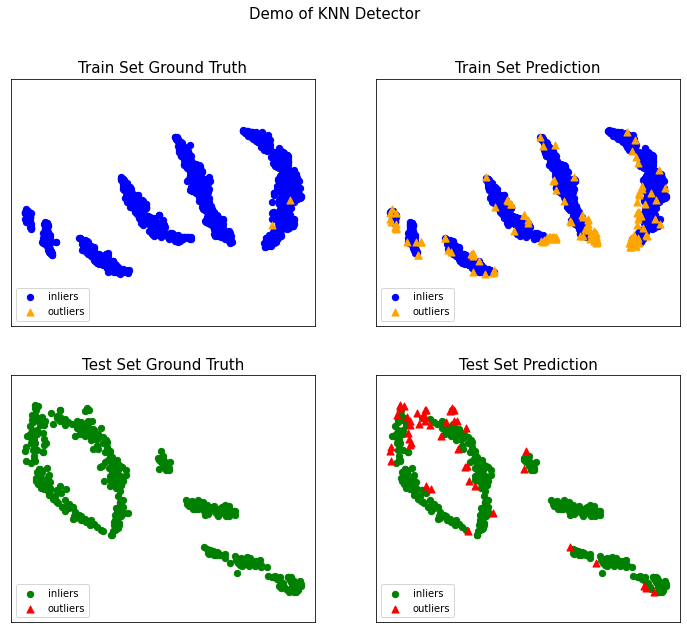

In [10]:
from pyod.utils.example import visualize
visualize('KNN', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

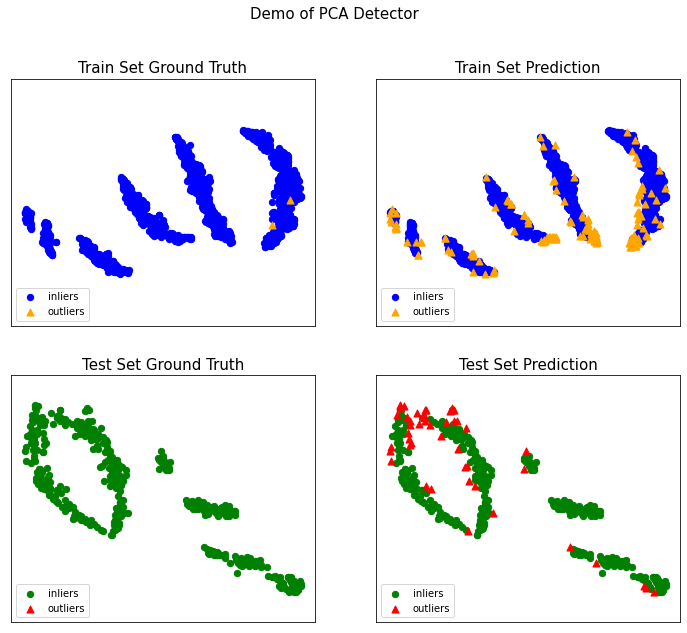

In [11]:
visualize('PCA', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

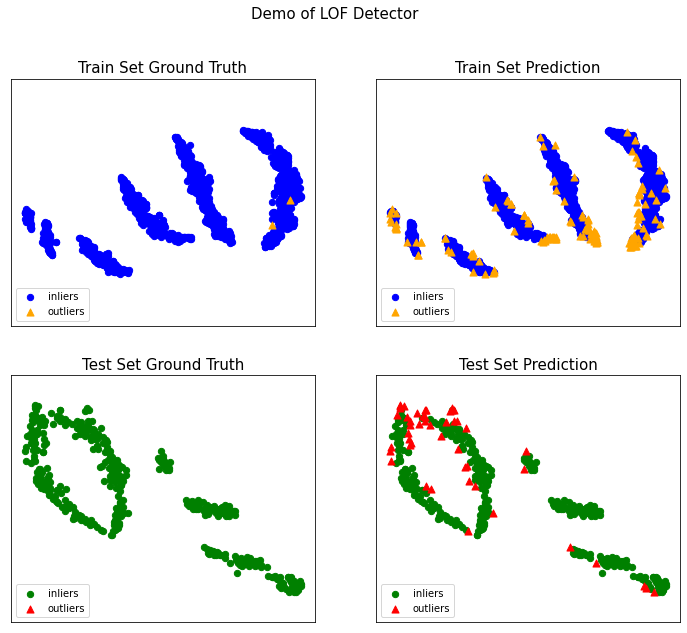

In [12]:
visualize('LOF', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

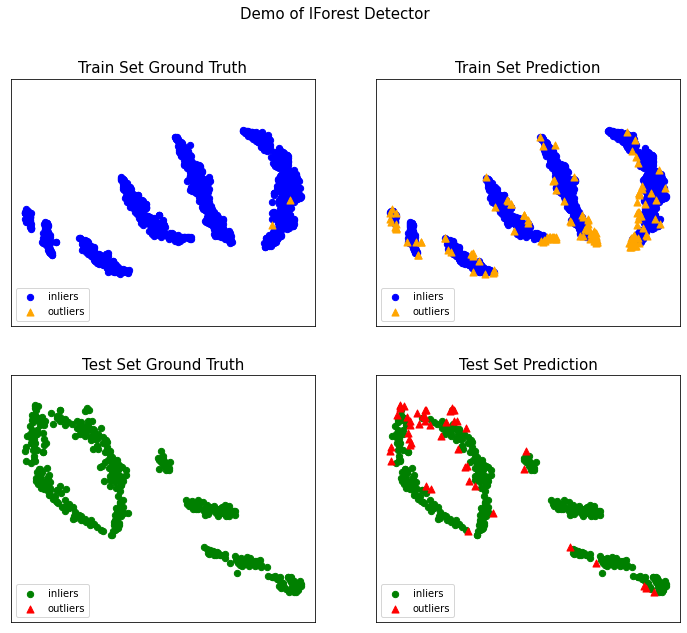

In [13]:
visualize('IForest', X_train_reduced_tsne, y_train, X_test_reduced_tsne, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)